Here the data collects from Quandl website using Quandl Library

In [1]:
#for install Quandl
!pip install Quandl

In [3]:
import pandas as pd #for data related tasks and operation
import matplotlib.pyplot as plt #for data visualization
import quandl #stock market API for fetching data from internet
from sklearn.linear_model import LinearRegression

With Quandl API we will fetch TCS stock data of one month for the prediction

In [9]:
quandl.ApiConfig.api_key = '' #enter you key
stock_data = quandl.get('NSE/TCS', start_date = '2018-12-01', end_date = '2018-12-31')
print(stock_data) #to see imported data

               Open     High      Low     Last    Close  Total Trade Quantity  \
Date                                                                            
2018-12-03  1984.00  1990.00  1968.30  1984.00  1982.40             1610576.0   
2018-12-04  1983.00  2019.40  1971.00  2009.85  2010.85             3270615.0   
2018-12-05  2006.00  2018.00  1985.00  2003.90  2006.75             2501539.0   
2018-12-06  1998.00  2017.00  1979.60  1990.00  1992.70             2321216.0   
2018-12-07  1985.05  2003.90  1973.00  1999.85  1995.20             1680420.0   
2018-12-10  1975.00  2011.00  1960.00  1961.00  1975.80             2010786.0   
2018-12-11  1970.00  2010.00  1961.00  1997.05  2000.00             2942014.0   
2018-12-12  2001.10  2022.00  1984.95  2016.50  2016.80             2219993.0   
2018-12-13  2024.00  2029.70  1974.50  1981.95  1982.60             3748429.0   
2018-12-14  1983.00  1998.95  1975.25  1989.00  1989.75             2473761.0   
2018-12-17  1999.00  2004.90

With pandas the data converted to DataFrame

In [10]:
dataset = pd.DataFrame(stock_data)

In [11]:
dataset.head()
dataset.to_csv('TCS.csv') #now the TCS dataset converted into csv

In [12]:
#to read converted data
data = pd.read_csv('TCS.csv')

In [13]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-12-03,1984.00,1990.0,1968.3,1984.00,1982.40,1610576.0,31868.00
1,2018-12-04,1983.00,2019.4,1971.0,2009.85,2010.85,3270615.0,65568.23
2,2018-12-05,2006.00,2018.0,1985.0,2003.90,2006.75,2501539.0,50131.23
3,2018-12-06,1998.00,2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71
4,2018-12-07,1985.05,2003.9,1973.0,1999.85,1995.20,1680420.0,33463.26


In [14]:
#to check the null values
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

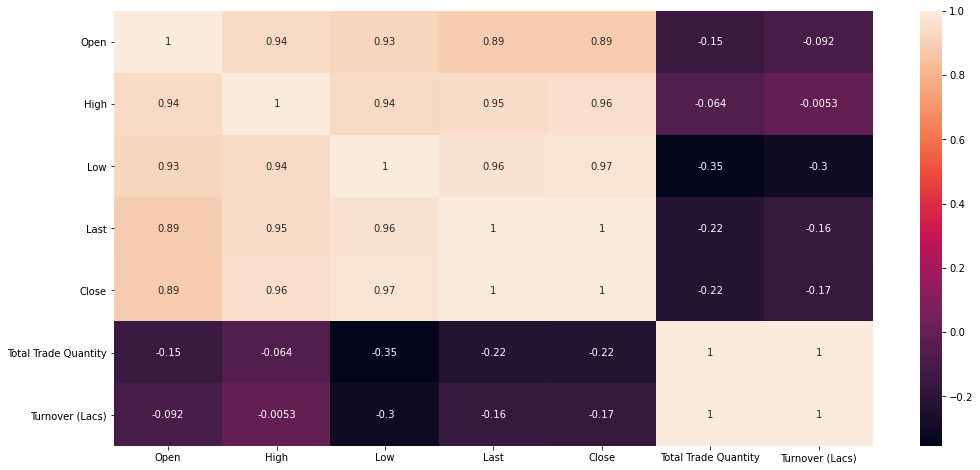

In [15]:
import seaborn as sns
plt.figure(1, figsize = (17, 8))
cor = sns.heatmap(data.corr(), annot = True)

Now we have to devide data into Dependent and Independent variavle

From the table we can see that date column is useful for the prediction but for simplicity we have to remove it because data format is not proper

Now we have to predict open price so this column is out dependent variable because open price depend on High, Low, Close, Last, Turnover etc

In [17]:
# let's select our features
x = data.loc[:,'High':'Turnover (Lacs)']
y = data.loc[:,'Open']

In [18]:
x.head()

,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1990.0,1968.3,1984.00,1982.40,1610576.0,31868.00
1,2019.4,1971.0,2009.85,2010.85,3270615.0,65568.23
2,2018.0,1985.0,2003.90,2006.75,2501539.0,50131.23
3,2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71
4,2003.9,1973.0,1999.85,1995.20,1680420.0,33463.26


In [19]:
y.head()

0    1984.00
1    1983.00
2    2006.00
3    1998.00
4    1985.05
Name: Open, dtype: float64

Now we have to split the data fro training and testing

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 0)

Let's fit our Linear Regression Model

In [21]:
LR = LinearRegression()

In [22]:
LR.fit(x_train, y_train)

LinearRegression()

In [23]:
LR.score(x_test, y_test)

0.9997647484047201

In [26]:
#giving a test data randomly
Test_data = [[2017.0, 1979.6, 1990.00, 1992.70, 2321216.0, 46373.71]]
prediction = LR.predict(Test_data)

In [27]:
print(prediction)

[2001.75159573]
